## Giới thiệu 
**K-means Clustering** là thuật toán đơn giản nhất trong *Unsupervised learning*.

Trong thuật toán K-means clustering, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thể nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho dữ liệu trong cùng một cụm có tính chất giống nhau.

### Tóm tắt thuật toán
Đầu vào: Dữ liệu $\mathbf{X}$ và số lượng cluster cần tìm $\mathbf{K}$

Đầu ra: Các center $\mathbf{M}$ và label vector cho từng điểm dữ liệu $\mathbf{Y}$

1. Chọn K điểm bất kỳ làm các center ban đầu.
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
4. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
5. Quay lại bước 2.

## Ứng dụng trên Python

### Khởi tạo dữ liệu

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

### Hiển thị dữ liệu

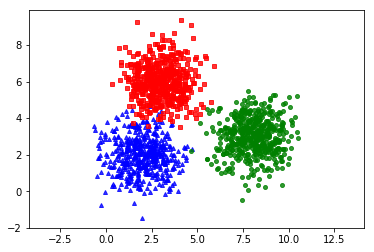

In [6]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

### Kết quả tìm được bằng thư viện scikit-learn

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


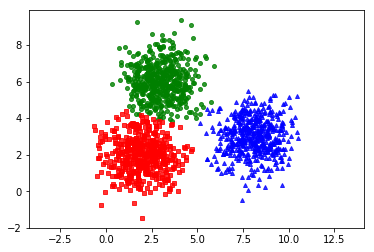

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Thảo luận
### Hạn chế
1. **Cần biết số lượng cluster cần clustering**
2. **Nghiệm cuối cùng phụ thuộc vào các centers được khởi tạo ban đầu**
3. **Các cluster cần có số lượng điểm gần bằng nhau**
4. **Các cluster cần có dạng hình tròn.** 
Tức các cluster tuân theo phân phối chuẩn và ma trận hiệp phương sai là ma trận đường chéo có các điểm trên đường chéo giống nhau.